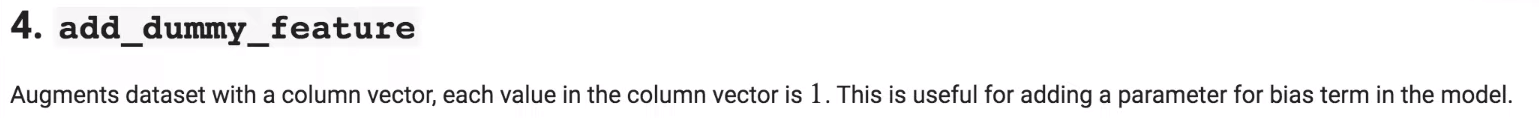

In [1]:
import numpy as np
import pandas as pd

In [2]:
x = np.array(
    [
        [7, 1],
        [1, 8],
        [2, 0],
        [9, 6],                
    ]
)

from sklearn.preprocessing import add_dummy_feature

x_new = add_dummy_feature(x)
x_new

array([[1., 7., 1.],
       [1., 1., 8.],
       [1., 2., 0.],
       [1., 9., 6.]])

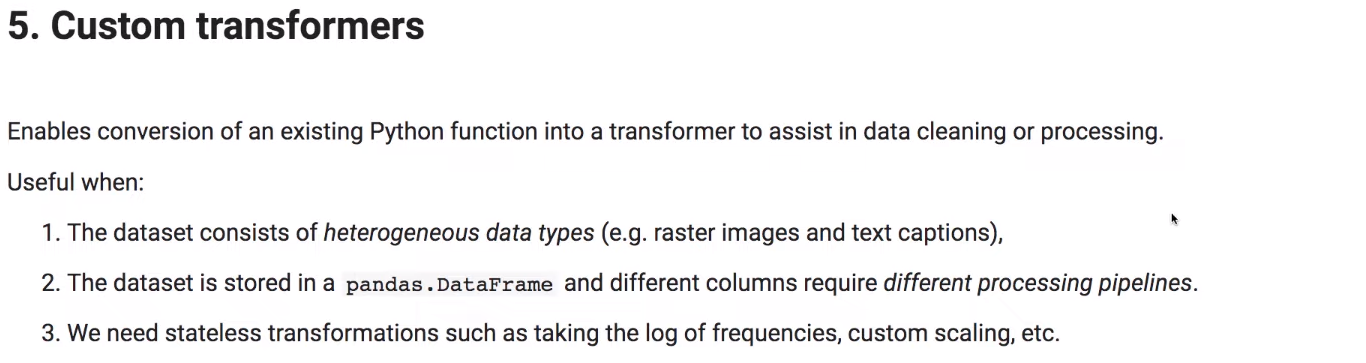

In [3]:
from sklearn.preprocessing import FunctionTransformer

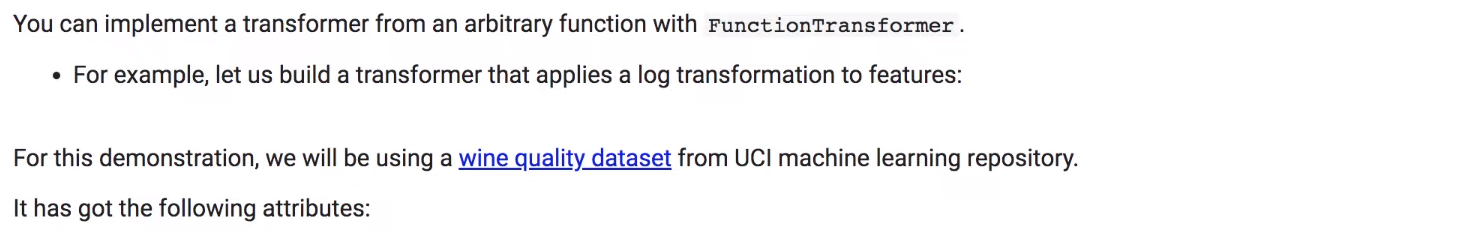
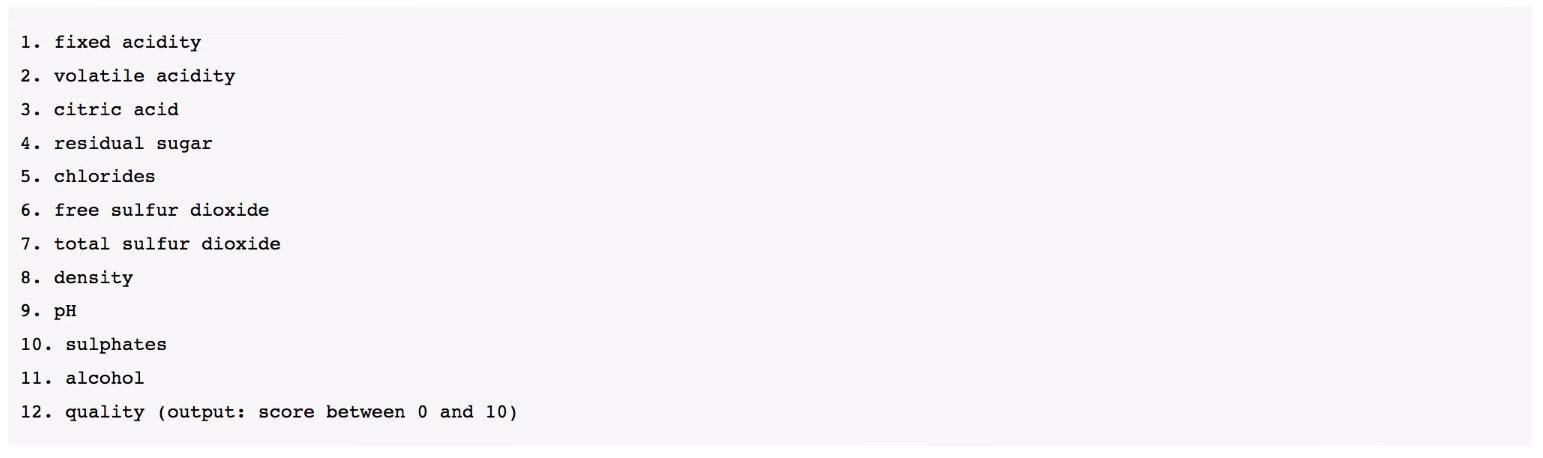

In [5]:
wine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


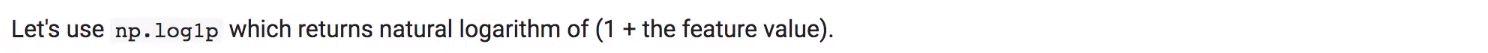

In [6]:
transformer = FunctionTransformer(np.log1p, validate=True)
wine_data_transformed = transformer.transform(np.array(wine_data))
pd.DataFrame(wine_data_transformed, columns=wine_data.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,2.215842,0.178100,1.722767,2.091864,2.186051,2.322388,2.827314
volatile acidity,1599.0,0.417173,0.114926,0.113329,0.329304,0.418710,0.494696,0.947789
citric acid,1599.0,0.228147,0.152423,0.000000,0.086178,0.231112,0.350657,0.693147
residual sugar,1599.0,1.218131,0.269969,0.641854,1.064711,1.163151,1.280934,2.803360
chlorides,1599.0,0.083038,0.038991,0.011929,0.067659,0.076035,0.086178,0.476855
free sulfur dioxide,1599.0,2.639013,0.623790,0.693147,2.079442,2.708050,3.091042,4.290459
total sulfur dioxide,1599.0,3.634750,0.682575,1.945910,3.135494,3.663562,4.143135,5.669881
density,1599.0,0.691519,0.000945,0.688170,0.690945,0.691521,0.692064,0.694990
pH,1599.0,1.460557,0.035760,1.319086,1.437463,1.460938,1.481605,1.611436
sulphates,1599.0,0.501073,0.093731,0.285179,0.438255,0.482426,0.548121,1.098612


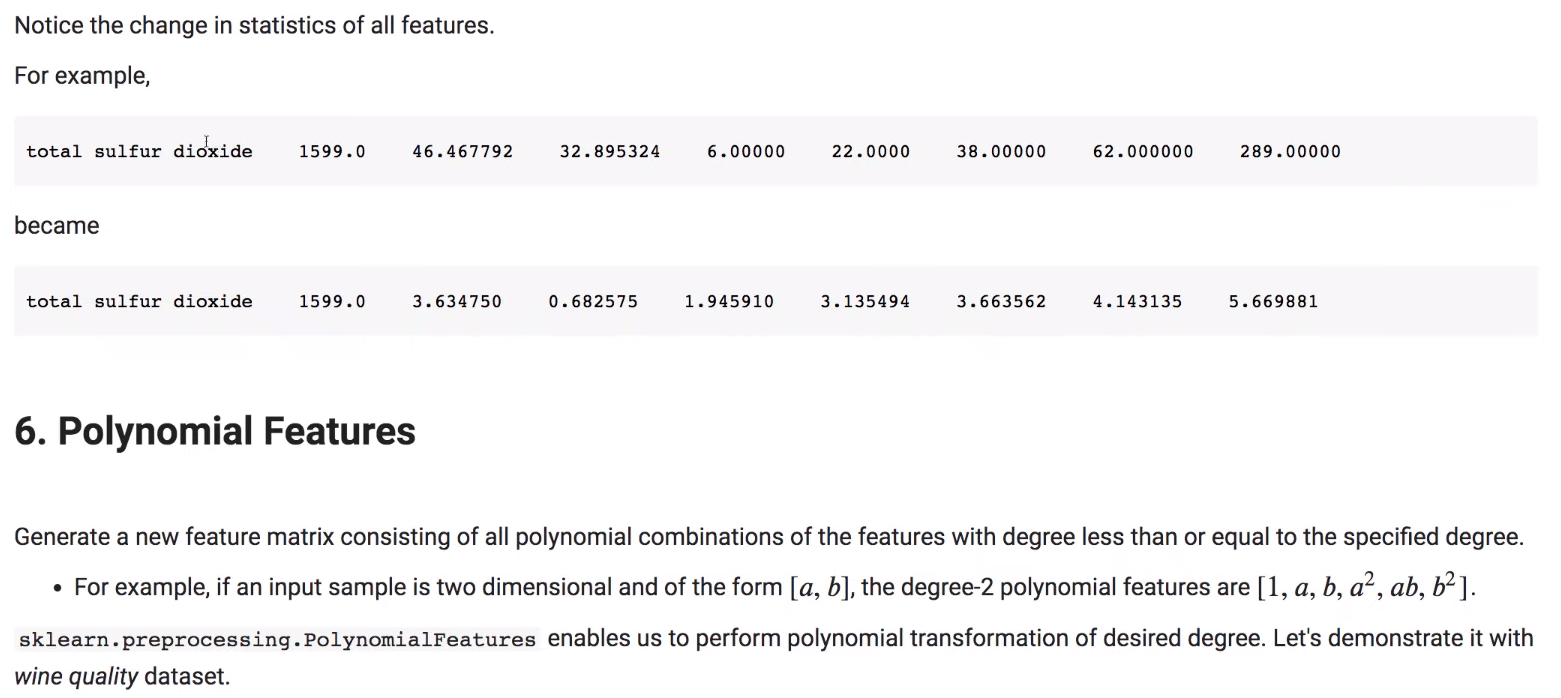

In [7]:
from sklearn.preprocessing import PolynomialFeatures

wine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
wine_data_copy = wine_data.copy()
wine_data = wine_data.drop(['quality'], axis=1)
print('Number of features before transformation = ', wine_data.shape[1])

# Let's fit a polynomial of degree 2 to wine_data
poly = PolynomialFeatures(degree=2)
poly_wine_data = poly.fit_transform(wine_data)
print('Number of features after transformation = ', poly_wine_data.shape[1])


Number of features before transformation =  11
Number of features after transformation =  78


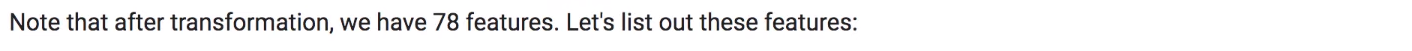

In [8]:
poly.get_feature_names_out()

array(['1', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'fixed acidity^2', 'fixed acidity volatile acidity',
       'fixed acidity citric acid', 'fixed acidity residual sugar',
       'fixed acidity chlorides', 'fixed acidity free sulfur dioxide',
       'fixed acidity total sulfur dioxide', 'fixed acidity density',
       'fixed acidity pH', 'fixed acidity sulphates',
       'fixed acidity alcohol', 'volatile acidity^2',
       'volatile acidity citric acid', 'volatile acidity residual sugar',
       'volatile acidity chlorides',
       'volatile acidity free sulfur dioxide',
       'volatile acidity total sulfur dioxide',
       'volatile acidity density', 'volatile acidity pH',
       'volatile acidity sulphates', 'volatile acidity alcohol',
       'citric acid^2', 'citric acid residual sugar',
       'citric acid chlorides', 'citric aci

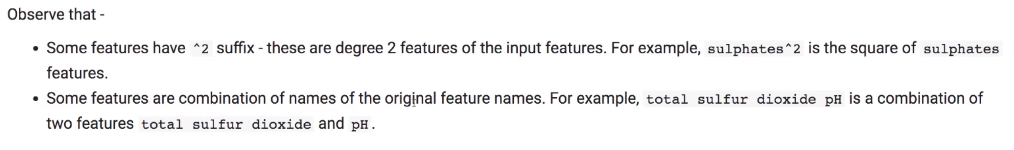
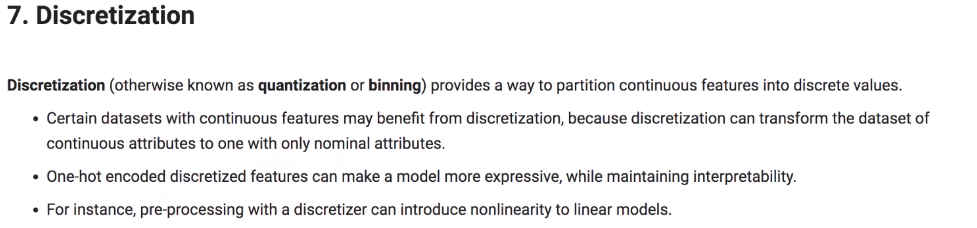

In [6]:
# KBinsDiscretizer discretizes features into k bins
from sklearn.preprocessing import KBinsDiscretizer

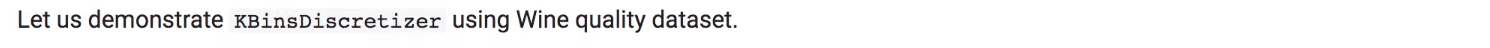

In [8]:
wine_data = wine_data.copy()

# transform the dataset with KBinsDiscretizer
enc = KBinsDiscretizer(n_bins=10, encode='onehot')
X = np.array(wine_data['chlorides']).reshape(-1, 1)
X_binned = enc.fit_transform(X)

In [11]:
X_binned

<1599x10 sparse matrix of type '<class 'numpy.float64'>'
	with 1599 stored elements in Compressed Sparse Row format>

In [11]:
print(X[:5])
X_binned.toarray()[:5]

[[0.076]
 [0.098]
 [0.092]
 [0.075]
 [0.076]]


array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

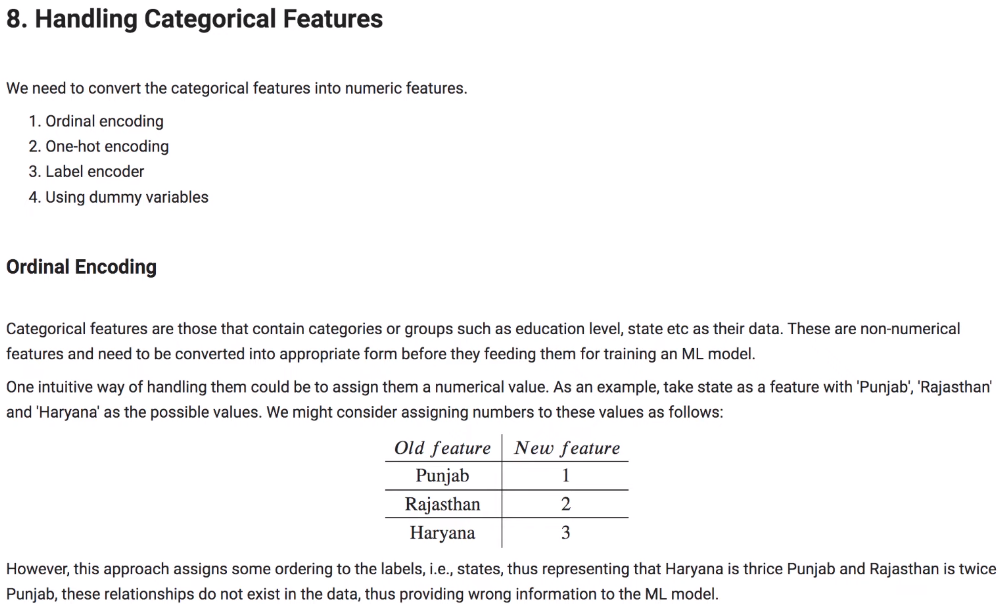
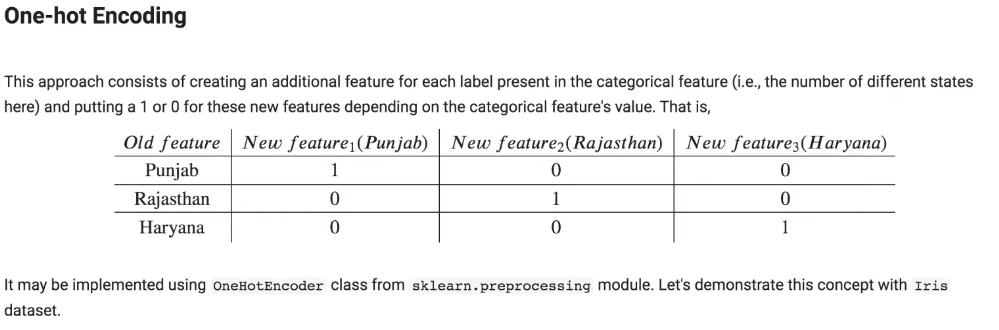


In [12]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

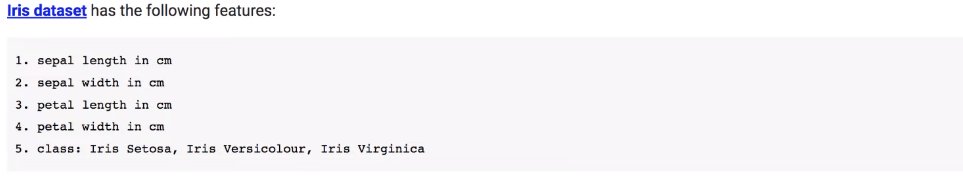

In [13]:
cols = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
iris_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None, names=cols)
iris_data.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


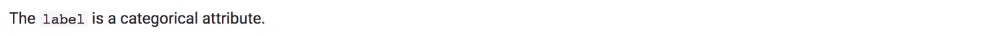

In [15]:
iris_data.label.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [15]:
iris_data.label.values

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [18]:
iris_data.label.values.reshape(-1, 1)

array([['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-se

In [16]:
onehotencoder = OneHotEncoder(categories='auto')
print('Shape of y before encoding', iris_data.label.shape)

'''
Passing 1d arrays as data to onehotencoder is deprecated in version,
hence reshape to (-1, 1) to have two dimensions.
Input of onehotencoder fit_transform must not be 1-rank array 
'''
iris_labels = onehotencoder.fit_transform(iris_data.label.values.reshape(-1, 1))

# y.reshape(-1, 1) is 450x1 sparse matrix of type '<class 'numpy.float64'>'
# with 150 stored elements in Coordinate format
# y is a 150x3 sparse matrix of type '<class 'numpy.float64'>' with 150 stored
# elements in compressed sparse row format
print('Shape of y after encoding', iris_labels.shape)

# since output is sparse use to_array() to expand it
print('First 5 labels:')
print(iris_labels.toarray()[:5])

Shape of y before encoding (150,)
Shape of y after encoding (150, 3)
First 5 labels:
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


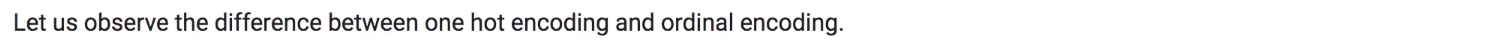


In [17]:
enc = OrdinalEncoder()
iris_labels = np.array(iris_data['label'])

iris_labels_transformed = enc.fit_transform(iris_labels.reshape(-1, 1))
print('Unique labels:', np.unique(iris_labels_transformed))

print('\nFirst 5 labels:')
print(iris_labels_transformed[:5])

Unique labels: [0. 1. 2.]

First 5 labels:
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


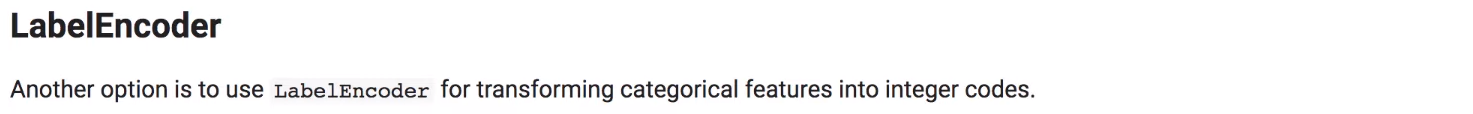

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
# get the class column in the new variable
iris_labels = np.array(iris_data['label'])

# encode the class names to integers 
enc = LabelEncoder()
label_integer = enc.fit_transform(iris_labels)
label_integer

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

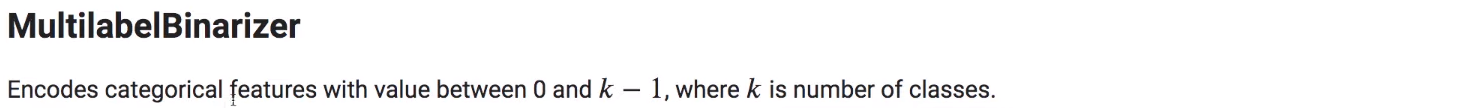

In [20]:
movie_generes = [
    {'action', 'comedy'},
    {'comedy'},
    {'action', 'thriller'},
    {'science-fiction', 'action', 'thriller'}
]

In [21]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb.fit_transform(movie_generes)

array([[1, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 1],
       [1, 0, 1, 1]])

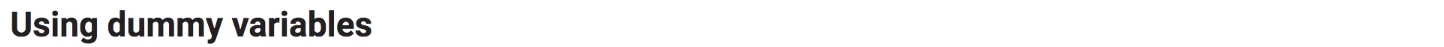

In [22]:
# use get-dummies to create a one-hot encoding for each unique catagorical value in the 'class' column
# Convert categorical class variable to one-hot encoding:
iris_data_onehot = pd.get_dummies(iris_data, columns=['label'], prefix=['one_hot'])
iris_data_onehot

,sepal length,sepal width,petal length,petal width,one_hot_Iris-setosa,one_hot_Iris-versicolor,one_hot_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


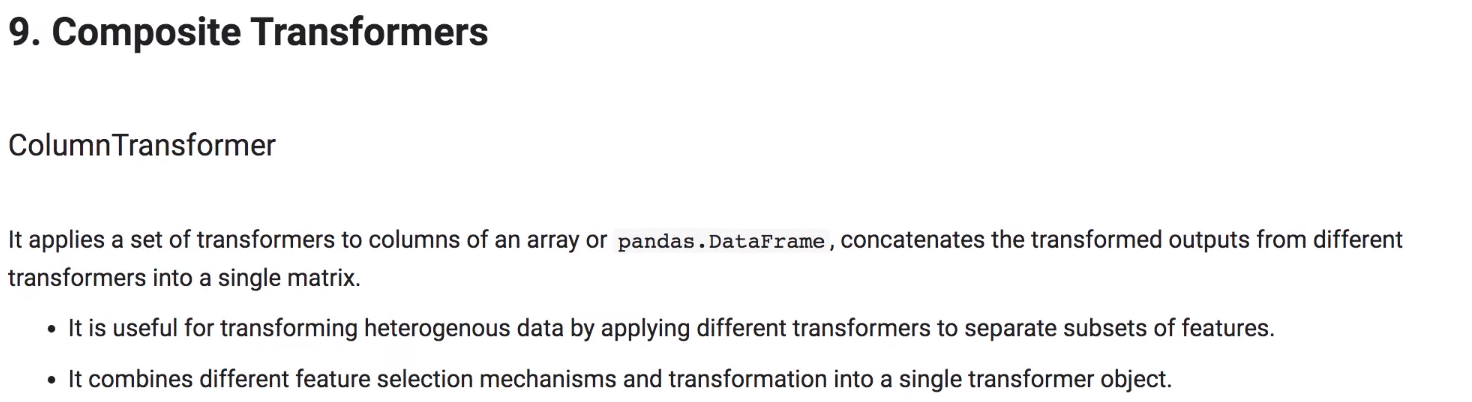

In [22]:
 x = [
     [20.0, 'male'],
     [11.2, 'female'],
     [15.6, 'female'],
     [13.0, 'male'],
     [18.6, 'male'],
     [16.4, 'female'],
 ]

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MaxAbsScaler, OneHotEncoder

ct = ColumnTransformer([
    ('scaler', MaxAbsScaler(), [0]),
    ('pass', 'passthrough', [0]),
    ('encoder', OneHotEncoder(), [1]),    
])

print(ct.fit_transform(x))

[[1.0 20.0 0.0 1.0]
 [0.5599999999999999 11.2 1.0 0.0]
 [0.78 15.6 1.0 0.0]
 [0.65 13.0 0.0 1.0]
 [0.93 18.6 0.0 1.0]
 [0.82 16.4 1.0 0.0]]


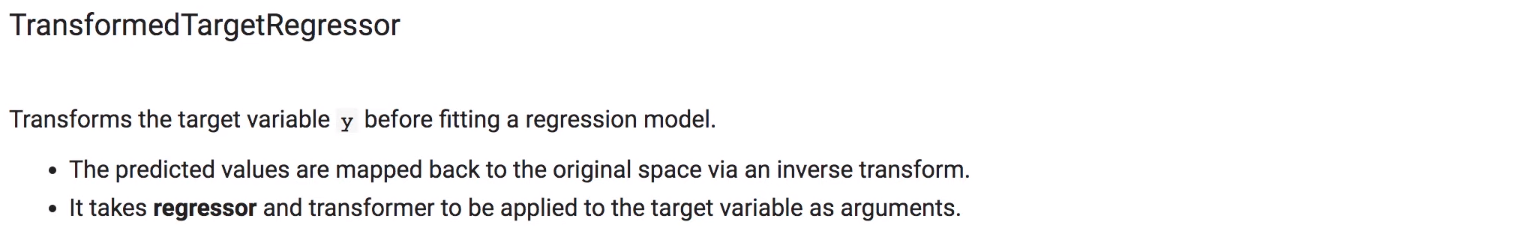
   

In [25]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

X, y = fetch_california_housing(return_X_y=True)
X, y = X[:2000, :], y[:2000]    # select a subset of data

transformer = MaxAbsScaler()

# Two regressors - one based on original label
regressor = LinearRegression()

# second regressor with transformed labels
regr = TransformedTargetRegressor(regressor=regressor, transformer=transformer)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
regr.fit(X_train, y_train)
print('R2 score of transformed label regression: {0:.2f}'.format(regr.score(X_test, y_test)))

raw_target_regr = LinearRegression().fit(X_train, y_train)
print('R2 score of raw label regression: {0:.2f}'.format(raw_target_regr.score(X_test, y_test)))


R2 score of transformed label regression: 0.59
R2 score of raw label regression: 0.59
